In [3]:
import numpy as np 

In [4]:
import gymnasium as gym

In [5]:
import random 

In [6]:
import matplotlib.pyplot as plt

In [7]:
from tqdm import tqdm

In [8]:
env = gym.make("Pendulum-v1")

In [9]:
env.observation_space

Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)

In [10]:
env.action_space

Box(-2.0, 2.0, (1,), float32)

In [11]:
env.reset(seed = 42)

(array([-0.14995256,  0.9886932 , -0.12224312], dtype=float32), {})

In [12]:
def discretize_continuous_value(continuous_value,  min_value, interval_width, num_intervals):
    num_intervals = num_intervals - 1
    discrete_value = int((continuous_value - min_value ) / interval_width * num_intervals)
    return discrete_value

In [28]:
def QLearning(lab ,eps = 1 ,gamma = 0.9 , n_episode = 100 , num_intervals = 5)  : 
    Q = np.zeros((num_intervals*2 , num_intervals*2, num_intervals*2 , num_intervals))
    n = np.ones(( num_intervals*2 ,num_intervals*2, num_intervals*2 ,num_intervals ))
    A = np.linspace(env.action_space.low[0], env.action_space.high[0], num_intervals)
    
    steps = []
    acts = np.arange(num_intervals)
    num_intervals = num_intervals *2
    res = []
    
    for i in range(n_episode): 
        if i == n_episode - 1 : 
            lab = gym.make("Pendulum-v1" , render_mode = "human")
            print("rendering...")
        s = tuple(lab.reset())
        s = s[0]
        s= (discretize_continuous_value(s[0] , -1 , 2 , num_intervals) , discretize_continuous_value(s[1] , -1 , 2 , num_intervals) , discretize_continuous_value(s[2] , -8 , 16 , num_intervals))
        done = False 
        t = 0 
        rs = []
        while  not done : 
            r = np.random.rand()
            
            arr = Q[s[0] , s[1] , s[2],: ]
            
            if r <= eps : 
                act = random.choice(acts)
            else :
                
                act = np.argmax(arr)
            act_un = A[act]
            s_new , r , terminated , truncated , _ = lab.step([act_un])
            s_new = (discretize_continuous_value(s_new[0] , -1 , 2 , num_intervals) , discretize_continuous_value(s_new[1] , -1 , 2 , num_intervals) , discretize_continuous_value(s_new[2] , -8 , 16 , num_intervals))
            # quality of current state
            q_s_a=  Q[s[0] , s[1] , s[2],act]
            

            
            # alpha 
            alpha = 1/(n[s[0] , s[1] ,  s[2], act])
            
            
            #quality of next_state
            q_sn_a = np.max(Q[s_new[0] , s_new[1] , s_new[2],:])
            
            # calculation 
            
            q =  q_s_a+  alpha  *(r + gamma* q_sn_a - q_s_a)
            
            Q[s[0] , s[1] , s[2],act] = q 
            n[s[0] , s[1] , s[2] ,  act] = n[s[0] , s[1] , s[2] , act] + 1
            s = s_new
            t+=1 
            eps = eps * 0.99999
            done = terminated or truncated
            rs.append(r)
        
        res.append(np.sum(rs))
    return res , Q 


In [23]:
random.seed(42)
np.random.seed(42)
QLearning(env , eps = 1 ,gamma = 0.9 , n_episode = 1600 , num_intervals = 10 , num_actions = 2)

rendering...


([-1687.4717687216335,
  -1045.1387078909775,
  -1319.9411413520133,
  -1155.228369356722,
  -1569.5378539633414,
  -1358.4042224784203,
  -949.5170264290552,
  -999.478463439726,
  -1088.2410517652233,
  -1127.3413050983816,
  -939.509661881682,
  -1005.2443162400698,
  -1337.7568099512987,
  -990.7374595371239,
  -1457.3791478085268,
  -1341.3774028985663,
  -1258.4626346670043,
  -923.7141087636943,
  -1285.6633662206305,
  -1284.2347673281129,
  -1025.5446472882054,
  -776.8054156302487,
  -1120.4261721732023,
  -1238.8632631159498,
  -1533.637771688016,
  -1083.909183262761,
  -1084.8963477129398,
  -899.3069948817877,
  -1347.8876061992898,
  -1092.1052888880786,
  -1072.2964394014643,
  -1078.5411969853221,
  -982.6101246303352,
  -1335.4178860233976,
  -863.1440859768074,
  -1600.535900613406,
  -1237.6145215930246,
  -906.5045703624996,
  -1647.9242934627491,
  -1372.1171902377812,
  -862.4446901558617,
  -1579.5010050505143,
  -1099.7837958977098,
  -1355.4121902890647,
  -12

In [31]:
random.seed(42)
np.random.seed(42)
l = []
for i in tqdm(range(5)) : 
    result  = QLearning(env , eps = 1 ,gamma = 0.9 , n_episode = 1000 , num_intervals = 5 )
    l.append(result[0])
l = np.array(l)
l = np.mean(l , axis = 0 )
l.shape


  0%|          | 0/5 [00:00<?, ?it/s]

rendering...


 20%|██        | 1/5 [00:17<01:08, 17.12s/it]

rendering...


 40%|████      | 2/5 [00:34<00:51, 17.20s/it]

rendering...


 60%|██████    | 3/5 [00:51<00:34, 17.12s/it]

rendering...


 80%|████████  | 4/5 [01:08<00:17, 17.08s/it]

rendering...


100%|██████████| 5/5 [01:25<00:00, 17.15s/it]


(1000,)

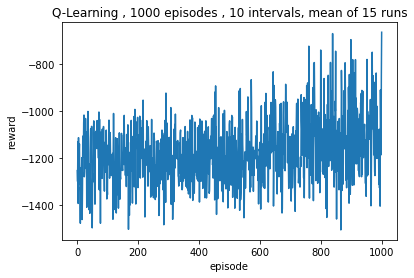

In [32]:
plt.plot(l)
plt.title("Q-Learning , 1000 episodes , 10 intervals, mean of 15 runs")
plt.xlabel("episode")
plt.ylabel("reward")
plt.show()